In [5]:
##Importing Package

import numpy as np # The fundamental package for scientific computing with Python.
import csv  #csv module is for saving the data
import pandas as pd #reading data from csv
import time # for timming process
import LESbplume as lp # importing LESbplume and naming it at lp

In [10]:
## Importing data from .csv files

# All .csv data file are in the 1D data shape. Data was orginally in 4D (45,45,700,time) 
# then converted to 1D for conviniently storing. 

# Input the time step from 0 to 500
Start = 0 
End = 540
# Data shape:
nx = 45
ny = 45
nz = 700
# Eulerian grid size:
dx = 40 #meter
dy = 40
dz = 10
dt = 10 #10s ever time step
D = 400 #meter

sk = Start*45*45*700
nt = End - Start
n = 45*45*700*nt

# Name of the data
name = 'Helium_NOFLUX_00'

# Please INPUT the path to each file:
# EX: for Windows: r"D:\Helium_FLUX_1\He_h01_01_T.csv"
#     for MAC:     r'/Volumes/ThanhPor/Helium_FLUX_1/He_h01_01_W.csv'
# If the data is in the same folder then only put the name of the file.

# # Time
# dft = pd.read_csv(r"D:\Documents\Helium_2\\Helium_2_T.csv",skiprows = sk,nrows = n, dtype =np.float32, header = None)
# datat = dft.to_numpy()
# datat = np.reshape(datat, (nx,ny,nz,nt), order="F") #reshaping data to (45,45,700,timestep) in the "F" order
# del dft

# U data
dfu = pd.read_csv(r"D:\Documents\Helium_NOFLUX_00\Helium_NOFLUX_00\He_h00_01_U.csv",skiprows = sk,nrows = 2, header = None)
if(dfu[0][0].isnumeric()):
    print(" ")
else:
    sk = sk+1
dfu = pd.read_csv(r"D:\Documents\Helium_NOFLUX_00\Helium_NOFLUX_00\He_h00_01_U.csv",skiprows = sk,nrows = n, dtype =np.float32, header = None)
datau = dfu.to_numpy()
datau = np.reshape(datau,  (nx,ny,nz,nt), order="F")
del dfu

# V data
dfv = pd.read_csv(r"D:\Documents\Helium_NOFLUX_00\Helium_NOFLUX_00\He_h00_01_V.csv",skiprows = sk,nrows = n, dtype =np.float32, header = None)
datav = dfv.to_numpy()
datav = np.reshape(datav,  (nx,ny,nz,nt), order="F")
del dfv

# W data
dfw = pd.read_csv(r"D:\Documents\Helium_NOFLUX_00\Helium_NOFLUX_00\He_h00_01_W.csv",skiprows = sk,nrows = n, dtype =np.float32, header = None)
dataw = dfw.to_numpy()
dataw = np.reshape(dataw,  (nx,ny,nz,nt), order="F")
del dfw

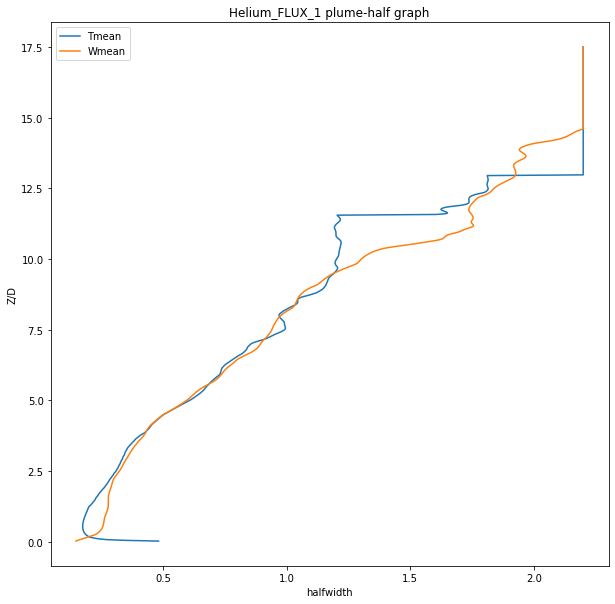

In [13]:
# Plumehalf graph
# Estimated time: ~1 minutes
# Input (u,v,w,threshold,dx,dy,dz,D,graphname)

threshold = 1/np.exp(1) #input threshold
lp.plumehalfgraph(dataw,datat,threshold,dx,dy,dz,D,name) #plumehalfgraph function


MovieWriter matplotlib.animation.PillowWritter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


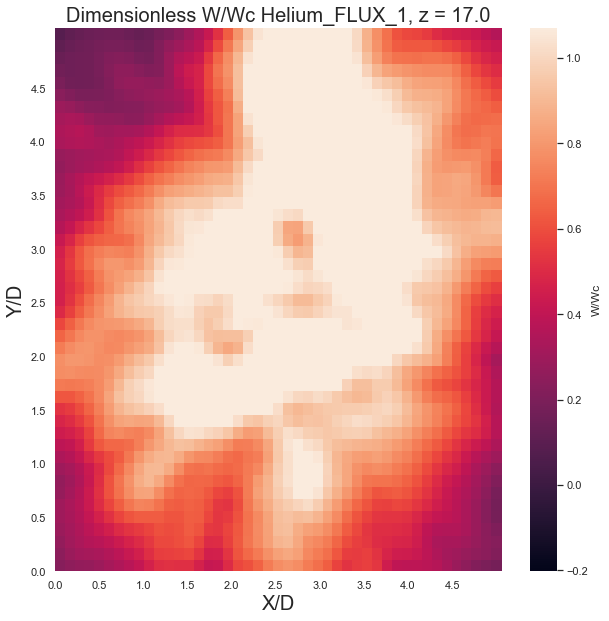

In [15]:
# Top_view_graph
# Estimated time: ~1 minutes
# Input (data(w or t),type_data,file_name,dx,dy,dz,D,frame) * more frame will take longer

datatype = "W/Wc" # "W/Wc" or "T"/Tc"

lp.topviewmap(dataw,datatype,name,dx,dy,dz,D,frame=20)



In [16]:
# Calculate Omega vortex criterion
# Estimated time: 8 minutes
# Input (u,v,w,dx,dy,dz)

tic = time.perf_counter()

ome = lp.omega(datau,datav,dataw,dx,dy,dz) # calculated the omega vortex criterion and put it in the 'ome' matrix

toc1 = time.perf_counter()
print(f"Finished Time: {((toc1 - tic)/60):0.4f} minutes")

Finished Time: 3.7123 minutes


In [6]:
#delete in case running out of memeory
# del ome

In [8]:
# Converting Cartesian to Polar
# Estimated time: 1 mins
# Input (u,v,w,dx,dy,dz)

tic = time.perf_counter()

Ur,Utheta,Uw = lp.cart2pol(datau,datav,dataw,dx,dy,dz)

toc1 = time.perf_counter()
print(f"Time: {toc1 - tic:0.4f} seconds")

Time: 54.5153 seconds


In [10]:
# del Ur,Utheta,Uw

In [11]:
# Calculate Lambda2 
# Estimated time: 2h-3h for 500 time-step
# Input (u,v,w,dx,dy,dz)

tic = time.perf_counter()  
lamb2 = lp.lambda2(datau,datav,dataw,dx=40,dy=40,dz=10)
toc1 = time.perf_counter()
print(f"Time: {((toc1 - tic)/60):0.4f} minutes")

Time: 156.3787 minutes


In [6]:
#delete in case running out of memeory
# del lamb2

In [12]:
# Saving calculated data like Omega or Lambda2
# Estimated time: 30 minutes for 500 time steps

#INPUT : 
filedata = lamb2 #omega matrix 'ome'
vortex_criterion = "lambda2" #omega or lambda2 or other criterion
#savecsv function
filename = name +'_'+ vortex_criterion #name of the file
lp.savecsv(filedata,filename)


Time: 25.5218 minutes
